<a href="https://colab.research.google.com/github/chunyulin/tf2020ncku/blob/master/1_LoadModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load models from Google drive (Or, from your own storage server.)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
GD_PATH="/content/drive/'My Drive'/Colab_shared"
!cp -r {GD_PATH}/mnist_v0 ./model/
!ls

drive  model  sample_data


# Load the model

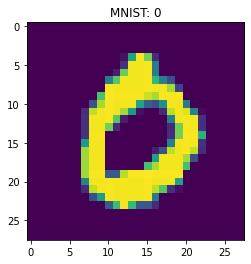

In [0]:
# Load data

import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    ## normalization

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

## let's have a look on the data
import matplotlib.pyplot as plt

ID=3
plt.imshow(x_test[3,...,0])
plt.title("MNIST: %d" % y_test[3])
plt.show()

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Model: "my_model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            multiple                  320       
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  2769024   
_________________________________________________________________
predict (Dense)              multiple                  1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


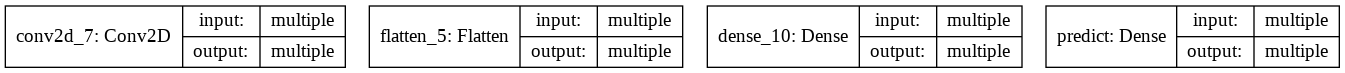

In [0]:
# Load saved model
MODEL_PATH="model/mnist_v0"
model_load = tf.keras.models.load_model(MODEL_PATH)

model_load.summary()

from keras.utils.vis_utils import plot_model
plot_model(model_load, show_shapes=True, to_file='model.png')


In [0]:
images = x_test[0:20]   # (10,28,28,1)
labels = y_test[0:20]
pre = model_load.predict(images).argmax(axis=-1)
print( pre)
print( labels)
print( pre-labels)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predict:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
